# Structured Data: NumPy's Structured Arrays

In [1]:
import numpy as np

In [2]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [3]:
x = np.zeros(4, dtype=int)
x

array([0, 0, 0, 0])

In [5]:
# U10 = Unicode String of maximum length 10
# i4 = 4-byte (i.e., 32-bit) integer
# f8 = 8-byte (i.e., 64-bit) float

data = np.zeros(4, dtype={"names":('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})

print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [6]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [7]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [8]:
data[0]

('Alice', 25, 55.)

In [9]:
data[-1]['name']

'Doug'

In [10]:
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

# A. Exploring Structured Array Creation

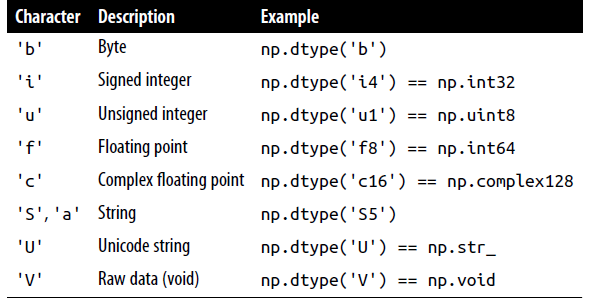

In [11]:
# Dictionary Method
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [12]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [13]:
# List of Tuples
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [14]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

# B. More Advanced Compound Types

In [15]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


# C. Record Arrays: Structured Arrays with a twist

* NumPy also provides record arrays (instances of the np.recarray class), which are
almost identical to the structured arrays just described, but with one additional feature:
fields can be accessed as attributes rather than as dictionary keys.

* The downside is that for record arrays, there is some extra overhead involved in
accessing the fields, even when using the same syntax



In [16]:
data['age']

array([25, 45, 37, 19])

In [17]:
data_rec = data.view(np.recarray)
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [18]:
data.age

AttributeError: 'numpy.ndarray' object has no attribute 'age'

In [19]:
data_rec.age

array([25, 45, 37, 19])

In [20]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

115 ns ± 5.86 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
2.49 µs ± 449 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.94 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
